# 正则表达式

## 常见匹配模式

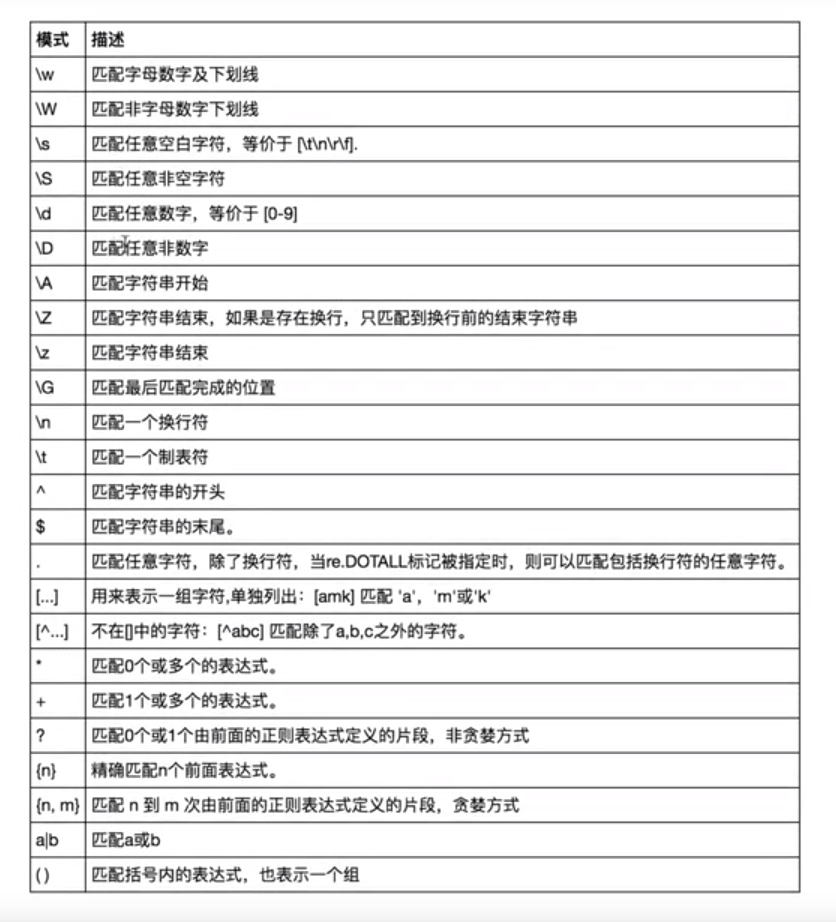

## re.match
re.match 尝试从字符串的起始位置匹配一个模式, 如果不是起始位置匹配成功的话, match()就返回none

re.match(pattern, string, flags=0)

### 最常规的匹配

In [16]:
# 常规匹配
import re

content = 'Hello 123 4567 World_This is a Regex Demo'
print(len(content))
result = re.match('^Hello\s\d\d\d\s\d{4}\s\w{10}.*Demo$',content)
print(result)
print(result.group())
print(result.span())

41
<re.Match object; span=(0, 41), match='Hello 123 4567 World_This is a Regex Demo'>
Hello 123 4567 World_This is a Regex Demo
(0, 41)


In [17]:
# 泛匹配

import re

content = 'Hello 123 4567 World_This is a Regex Demo'
print(len(content))
result = re.match('^Hello.*Demo$',content)
print(result)
print(result.group())
print(result.span())

41
<re.Match object; span=(0, 41), match='Hello 123 4567 World_This is a Regex Demo'>
Hello 123 4567 World_This is a Regex Demo
(0, 41)


In [20]:
# 匹配目标
# eg: 匹配 '1234567' 的部分

import re

content = 'Hello 1234567 World_This is a Regex Demo'
print(len(content))
result = re.match('^Hello\s(\d+)\sWorld.*Demo$',content)
print(result)
print(result.group())
print(result.group(1))
print(result.span())

40
<re.Match object; span=(0, 40), match='Hello 1234567 World_This is a Regex Demo'>
Hello 1234567 World_This is a Regex Demo
1234567
(0, 40)


In [21]:
# 贪婪匹配
import re

content = 'Hello 1234567 World_This is a Regex Demo'
print(len(content))
result = re.match('^He.*(\d+).*Demo$',content)
print(result)
print(result.group())
print(result.group(1)) # .* 会匹配尽可能多的字符, 所以最后只剩下 7
print(result.span())

40
<re.Match object; span=(0, 40), match='Hello 1234567 World_This is a Regex Demo'>
Hello 1234567 World_This is a Regex Demo
7
(0, 40)


In [23]:
# 非贪婪匹配
import re

content = 'Hello 1234567 World_This is a Regex Demo'
print(len(content))
result = re.match('^He.*?(\d+).*Demo$',content)
print(result)
print(result.group())
print(result.group(1)) # .* 会匹配尽可能少的字符, 所以最后匹配到了 1234567
print(result.span())

40
<re.Match object; span=(0, 40), match='Hello 1234567 World_This is a Regex Demo'>
Hello 1234567 World_This is a Regex Demo
1234567
(0, 40)


In [46]:
# 匹配模式
import re

content = """Hello 1234567 World_This 
is a Regex Demo
"""

result = re.match('^He.*?(\d+).*?Demo$',content)
print(result)

# 加入 re.S 后, . 可以匹配换行符
print("-----==== 加入匹配规则 ===-----")
result = re.match('^He.*?(\d+).*?Demo$',content,re.S)
print(result)
print(result.group())
print(result.group(1))

None
-----==== 加入匹配规则 ===-----
<re.Match object; span=(0, 41), match='Hello 1234567 World_This \nis a Regex Demo'>
Hello 1234567 World_This 
is a Regex Demo
1234567


In [36]:
# 转义
import re

content = 'price is $5.00'
print(len(content))
# result = re.match('price is $5.00',content)
result = re.match('price is \$5\.00',content)
print(result)
print(result.group())
print(result.span())

14
<re.Match object; span=(0, 14), match='price is $5.00'>
price is $5.00
(0, 14)


### 总结
尽量使用泛匹配、使用括号得到匹配目标、尽量使用非贪婪模式(.*?)、有换行符就用re.S

## re.search

re.search 扫描整个字符串并返回第一个成功的匹配。

In [42]:
import re

content = "Extra strings Hello 1234567 World_This is a Regex Demo Extra strings"
result = re.match('Hello.*?(\d+).*?Demo',content)
print(result)

None


In [13]:
import re

content = "Extra strings Hello 1234567 World_This is a Regex Demo Extra strings"
result = re.search('Hello.*?(\d+).*?Demo',content)
print(result)
print(result.group())
print(result.group(1))

<re.Match object; span=(14, 54), match='Hello 1234567 World_This is a Regex Demo'>
Hello 1234567 World_This is a Regex Demo
Hello 1234567 World_This is a Regex Demo


### 总结
为方便匹配, 能用search就不用match, match限定头部一致才行search不需要

## 匹配练习

In [54]:
html = """
<div id="songs-list">
  <h2 class="title">经典老歌</h2>
  <p class="introduction">
      经典老歌列表
  </p>
  <ul id="list" class="list-group">
    <li data-view="2">一路上有你</li>
    <li data-view="7">
        <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
    </li>
    <li data-view="4" class="active">
        <a href="/3.mp3" singer="齐秦">往事随风</a>
    </li>
    <li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a></li>
     <li data-view="5">
        <a href="/6.mp3" singer="邓丽君"><i class="fa fa-user"></i>但愿人长久</a>
    </li>
  </ul>
</div>
"""
import re

# result = re.search('<li.*?active.*?singer="(.*?)".*?>(.*?)</a>',html,re.S)
# if result:
#     print(result)
#     print(result.group())
#     print("-----------=============----------")
#     print(result.group(1),result.group(2))
    
# 去掉 active
# result = re.search('<li.*?singer="(.*?)".*?>(.*?)</a>',html,re.S)
# if result:
#     print(result)
#     print(result.group())
#     print("-----------=============----------")
#     print(result.group(1),result.group(2))
    
# 去掉 re.S
result = re.search('<li.*?singer="(.*?)".*?>(.*?)</a>',html)
if result:
    print(result)
    print(result.group())
    print("-----------=============----------")
    print(result.group(1),result.group(2))


<re.Match object; span=(348, 407), match='<li data-view="6"><a href="/4.mp3" singer="beyond>
<li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a>
-----------=============----------
beyond 光辉岁月


## re.findall
搜索字符串, 以列表形式返回全部能匹配的子串鞠爱红

In [101]:
html = """
<div id="songs-list">
  <h2 class="title">经典老歌</h2>
  <p class="introduction">
      经典老歌列表
  </p>
  <ul id="list" class="list-group">
    <li data-view="2">一路上有你</li>22222222222222
    <li data-view="7">
        <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
    </li>
    <li data-view="4" class="active">
        <a href="/3.mp3" singer="齐秦">往事随风</a>
    </li>
    <li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a></li>
    <li data-view="9"><a singer="陈慧琳">记事本</a></li>
    <li data-view="5">
        <a href="/6.mp3" singer="邓丽君">但愿人长久</a>
    </li>
  </ul>
</div>
"""
import re

result = re.findall('<li.*?href="(.*?)".*?singer="(.*?)".*?>(.*?)</a>',html,re.S)
print(result) # "一路上有你"和"记事本"因为没有 href 属性没有被匹配到
print(type(result))

print("-----------=============----------")
for r in result:
    print(r,"👉",r[0],r[1],r[2])
    
print("-----------======= ✨匹配所有歌曲 =======----------")
# ✨✨✨ \s*? 空格,回车换行等 ; ? 表示有或者没有
# (\w+)? 或者 写成 (\w*) 更安全, 防止匹配到没有名称的歌曲
result = re.findall('<li.*?>\s*?(<a>)?(\w*)(</a>)?\s*?</li>',html,re.S)
print(result)
print("-----------=============----------")
for r in result:
    print(r,"👉",r[1])


[('/2.mp3', '任贤齐', '沧海一声笑'), ('/3.mp3', '齐秦', '往事随风'), ('/4.mp3', 'beyond', '光辉岁月'), ('/6.mp3', '邓丽君', '但愿人长久')]
<class 'list'>
-----------=============----------
('/2.mp3', '任贤齐', '沧海一声笑') 👉 /2.mp3 任贤齐 沧海一声笑
('/3.mp3', '齐秦', '往事随风') 👉 /3.mp3 齐秦 往事随风
('/4.mp3', 'beyond', '光辉岁月') 👉 /4.mp3 beyond 光辉岁月
('/6.mp3', '邓丽君', '但愿人长久') 👉 /6.mp3 邓丽君 但愿人长久
-----------======= ✨匹配所有歌曲 =======----------
[('', '一路上有你', ''), ('', '沧海一声笑', '</a>'), ('', '往事随风', '</a>'), ('', '光辉岁月', '</a>'), ('', '记事本', '</a>'), ('', '但愿人长久', '</a>')]
-----------=============----------
('', '一路上有你', '') 👉 一路上有你
('', '沧海一声笑', '</a>') 👉 沧海一声笑
('', '往事随风', '</a>') 👉 往事随风
('', '光辉岁月', '</a>') 👉 光辉岁月
('', '记事本', '</a>') 👉 记事本
('', '但愿人长久', '</a>') 👉 但愿人长久


## re.sub
替换字符串中每一个匹配的子串后返回替换后的字符串。

In [34]:
import re

content = "Extra strings Hello 1234567 World_This is a233 3 Regex Demo Extra strings"
content1 = re.sub('\d+','',content)
print(content1)

print("-----------=============----------")
content2 = re.sub('\d+','😄',content)
print(content2)

Extra strings Hello  World_This is a  Regex Demo Extra strings
-----------=============----------
Extra strings Hello 😄 World_This is a😄 😄 Regex Demo Extra strings


In [65]:
import re

content = "Extra strings Hello 1234567 World_This is a233 3 Regex Demo Extra strings"
content = re.sub('(\d+)',r'\1 8910',content)
print(content)

Extra strings Hello 1234567 8910 World_This is a233 8910 3 8910 Regex Demo Extra strings


In [60]:
html = """
<div id="songs-list">
  <h2 class="title">经典老歌</h2>
  <p class="introduction">
      经典老歌列表
  </p>
  <ul id="list" class="list-group">
    <li data-view="2">一路上有你</li>22222222222222
    <li data-view="7">
        <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
    </li>
    <li data-view="4" class="active">
        <a href="/3.mp3" singer="齐秦">往事随风</a>
    </li>
    <li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a></li>
    <li data-view="9"><a singer="陈慧琳">记事本</a></li>
    <li data-view="5">
        <a href="/6.mp3" singer="邓丽君">但愿人长久</a>
    </li>
  </ul>
</div>
"""
import re

result = re.findall('<li.*?>(.*?)</li>',html,re.S)
print(result)
for r in result:
    print(r.strip()) # 去掉换行和空白字符等 ✨
    
print("-----------======= 去除a标签后,再findall =======----------")
html2 = re.sub("<a.*?>|</a>",'',html)
print(html2)
result = re.findall('<li.*?>(.*?)</li>',html2,re.S)
print(result)
for r in result:
    print(r.strip())
    
print("-----------====== 有a标签匹配歌手和歌曲名,没有a标签取歌曲名 =======----------")
result = re.findall('<li.*?>\s*?(<a.*?singer="(\w+)?">)?(\w*)(</a>)?\s*?</li>',html,re.S)
print(result)
for r in result:
    if(r[1]==None or r[1].strip()==''):
        print(r[2])
    else:
        print(r[1],"👉",r[2])

['一路上有你', '\n        <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>\n    ', '\n        <a href="/3.mp3" singer="齐秦">往事随风</a>\n    ', '<a href="/4.mp3" singer="beyond">光辉岁月</a>', '<a singer="陈慧琳">记事本</a>', '\n        <a href="/6.mp3" singer="邓丽君">但愿人长久</a>\n    ']
一路上有你
<a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
<a href="/3.mp3" singer="齐秦">往事随风</a>
<a href="/4.mp3" singer="beyond">光辉岁月</a>
<a singer="陈慧琳">记事本</a>
<a href="/6.mp3" singer="邓丽君">但愿人长久</a>
-----------======= 去除a标签后,再findall =======----------

<div id="songs-list">
  <h2 class="title">经典老歌</h2>
  <p class="introduction">
      经典老歌列表
  </p>
  <ul id="list" class="list-group">
    <li data-view="2">一路上有你</li>22222222222222
    <li data-view="7">
        沧海一声笑
    </li>
    <li data-view="4" class="active">
        往事随风
    </li>
    <li data-view="6">光辉岁月</li>
    <li data-view="9">记事本</li>
    <li data-view="5">
        但愿人长久
    </li>
  </ul>
</div>

['一路上有你', '\n        沧海一声笑\n    ', '\n        往事随风\n    ', '光辉岁月', '记事本', '\n      

## re.compile
将一个正则字符串编译成正则表达式对象, 以便于复用该匹配模式

In [111]:
import re

content= """Hello 1234567 World_This
is a Regex Demo
"""
pattern = re.compile('Hello.*?Demo',re.S) # 声明一次其他地方直接复用即可,非常方便
result = re.match(pattern,content)

# 相当于之前的
# result = re.match('Hello.*?Demo',content,re.S)

print(result)
print(result.group())

<re.Match object; span=(0, 40), match='Hello 1234567 World_This\nis a Regex Demo'>
Hello 1234567 World_This
is a Regex Demo


## 总结

- re.match
- re.search
- re.findall
- re.sub
- re.compile

## 实战练习
豆瓣读书 👉 https://book.douban.com

In [111]:
import re
import requests
from bs4 import BeautifulSoup

headers = { 
            "Host": "book.douban.com",
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:76.0) Gecko/20100101 Firefox/76.0",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
            "Accept-Language": "zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2",
            "Connection": "close"
            }

response = requests.get('https://book.douban.com',headers=headers)
# print(response.headers,response.status_code)
if response.status_code==200:
    soup = BeautifulSoup(response.text,'lxml')
    text_group = soup.find('div',class_='carousel')
    pattern = re.compile('<li.*?cover.*?href="(.*?)".*?src="(.*?)".*?title="(.*?)".*?more-meta.*?author.*?>(.*?)</span>.*?year.*?>(.*?)</span>.*?publisher.*?>(.*?)</span>.*?</li>',re.S)
#     pattern = re.compile('<li.*?cover.*?title="(.*?)".*?</li>',re.S)
    result = re.findall(pattern,str(text_group))
#     print(result)
    print(len(result))
    for r in result:
        url,cover,title,author,date,publisher = r # ✨
        author = re.sub('\s','',author)
        date = re.sub('\s','',date)
        publisher = re.sub('\s','',publisher)
        print(url,cover,title,author,date,publisher)


50
https://book.douban.com/subject/35637632/?icn=index-latestbook-subject https://img9.doubanio.com/view/subject/s/public/s34026065.jpg 穿越亚洲腹地（上卷）：向着拉萨漂流前行 [瑞典]斯文·赫定 2021-11 后浪丨广东旅游出版社
https://book.douban.com/subject/35637266/?icn=index-latestbook-subject https://img1.doubanio.com/view/subject/s/public/s34025719.jpg 蚁群 汤问棘 2021-11 上海社会科学院出版社
https://book.douban.com/subject/35638986/?icn=index-latestbook-subject https://img9.doubanio.com/view/subject/s/public/s34033605.jpg 劫后“天堂”：抗战沦陷后的苏州城市生活 巫仁恕 2021-11-22 广西师范大学出版社
https://book.douban.com/subject/35616114/?icn=index-latestbook-subject https://img2.doubanio.com/view/subject/s/public/s34009231.jpg 故宫与皇家生活 万依/王树卿/陆燕贞 2021-11-1 广西师范大学出版社
https://book.douban.com/subject/35616112/?icn=index-latestbook-subject https://img1.doubanio.com/view/subject/s/public/s34009229.jpg 紫禁城宫殿 于倬云 2021-11-1 广西师范大学出版社
https://book.douban.com/subject/35680673/?icn=index-latestbook-subject https://img1.doubanio.com/view/subject/s/public/s34054909.jpg 爱，需要学习：如何拥

In [95]:
# 豆瓣读书 本地匹配

# 使用正则解析本地数据不会卡死, 解析网络数据会卡死... 先用 bs 抽取一部分再去正则匹配就好了 

html = """
<div class="carousel">
        <div class="slide-list" style="width: 4725px; left: -675px;"><ul class="list-col list-col5 list-express slide-item clone">
          <li>
            <div class="cover">
              <a href="https://book.douban.com/subject/35640725/?icn=index-latestbook-subject" title="奥斯曼之影">
                <img src="https://img2.doubanio.com/view/subject/s/public/s34032153.jpg" alt="奥斯曼之影">
              </a>
            </div>
            <div class="info">
              <div class="title">
                <a href="https://book.douban.com/subject/35640725/?icn=index-latestbook-subject" title="奥斯曼之影：塞利姆的土耳其帝国与现代世界的形成">奥斯曼之影：塞利姆的土耳其帝国与现代世界的形成</a>
              </div>
              <div class="author">
                [美]阿兰·米哈伊尔（Alan Mikhail）
              </div>
              <div class="more-meta">
                <h4 class="title">
                  奥斯曼之影：塞利姆的土耳其帝国与现代世界的形成
                </h4>
                <p>
                  <span class="author">
                    [美]阿兰·米哈伊尔（Alan Mikhail）
                  </span>
                  /
                  <span class="year">
                    2021-11
                  </span>
                  /
                  <span class="publisher">
                    中信出版集团
                  </span>
                </p>
              </div>
            </div>
          </li>
  
          <li>
            <div class="cover">
              <a href="https://book.douban.com/subject/35638200/?icn=index-latestbook-subject" title="谈判中的城市空间">
                <img src="https://img1.doubanio.com/view/subject/s/public/s34026449.jpg" alt="谈判中的城市空间">
              </a>
            </div>
            <div class="info">
              <div class="title">
                <a href="https://book.douban.com/subject/35638200/?icn=index-latestbook-subject" title="谈判中的城市空间：城市化与晚明南京">谈判中的城市空间：城市化与晚明南京</a>
              </div>
              <div class="author">
                费丝言
              </div>
              <div class="more-meta">
                <h4 class="title">
                  谈判中的城市空间：城市化与晚明南京
                </h4>
                <p>
                  <span class="author">
                    费丝言
                  </span>
                  /
                  <span class="year">
                    2021-12
                  </span>
                  /
                  <span class="publisher">
                    浙江大学出版社
                  </span>
                </p>
                <p class="abstract">
                  
                  在帝制中国的晚期，城市化是发展的核心。尽管学者们一致认为，它既没有引发韦伯式的城市自治，也没有引发哈贝马斯式的公民社会，但它的影响仍备受争议。本书认为，这种概念性僵局源于这样一个事实：看似连续不断的城市扩张实际上被种种“王朝式城市主义”打断了。作者认为，历史学家不应将城市化视为商业化发展的副产品，而应将其视为每个朝代的制度框架和文化趋势所...
                </p>
              </div>
            </div>
          </li>
    </ul>
    </div>
      </div>
"""
import re

pattern = re.compile('<li.*?cover.*?href="(.*?)".*?src="(.*?)".*?title="(.*?)".*?more-meta.*?author.*?>(.*?)</span>.*?year.*?>(.*?)</span>.*?publisher.*?>(.*?)</span>.*?</li>',re.S)
# pattern = re.compile('<li.*?cover.*?href="(.*?)".*?src="(.*?)".*?title="(.*?)".*?</li>',re.S)
result = re.findall(pattern,html)
# print(result)
for r in result:
    print(r)

('https://book.douban.com/subject/35640725/?icn=index-latestbook-subject', 'https://img2.doubanio.com/view/subject/s/public/s34032153.jpg', '奥斯曼之影：塞利姆的土耳其帝国与现代世界的形成', '\n                    [美]阿兰·米哈伊尔（Alan Mikhail）\n                  ', '\n                    2021-11\n                  ', '\n                    中信出版集团\n                  ')
('https://book.douban.com/subject/35638200/?icn=index-latestbook-subject', 'https://img1.doubanio.com/view/subject/s/public/s34026449.jpg', '谈判中的城市空间：城市化与晚明南京', '\n                    费丝言\n                  ', '\n                    2021-12\n                  ', '\n                    浙江大学出版社\n                  ')


In [ ]:
# -*- coding: UTF-8 -*-
import requests
import re
from bs4 import BeautifulSoup
import time

#伪装成浏览器获取网页文本
#接受URL/返回网页文本
def get_html(url):
    try:  
        send_headers = { 
            "Host": "book.douban.com",
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:76.0) Gecko/20100101 Firefox/76.0",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
            "Accept-Language": "zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2",
            'Connection': 'close'
            }
        response=requests.get(url,headers=send_headers)
        if response.status_code==200:
             return response.text
    except Exception as e:
         print(e)
  

#解析主页面提取链接属性
#接受主页面/返回书本链接
def get_bookurl(html):
      soup=BeautifulSoup(html,'lxml')
      print(soup)
      urllist=[]
      #提取出图书的href属性
      for x in soup.find_all('a'):
         url=x['href']
         if re.match(r'https://book.douban.com/subject/\d{8}/\Z',url):
             urllist.append(url)
      urllist=urllist[: :2]
      return urllist     
#利用bs4解析书本页面
#接受书本页面/返回书本信息
#get_text()是获取标签之间的文本
def get_bookdata(html):
      book_data=[]
      soup=BeautifulSoup(html,'lxml')
      #提取书名
      title=soup.find('h1').get_text(strip=True)
      book_data.append(title)
      #提取图片 
      img=soup.find(class_='nbg')['href']
      book_data.append(img)
      #提取豆瓣评分
      douban_score=soup.find(class_='ll rating_num').get_text(strip=True)
      book_data.append(douban_score)
      return book_data
      
#插入数据到文本文档中
def intofile(data,file):  
    file=open(file,'a',encoding='utf-8')
    for i in data:
        file.write(str(i))
        file.write('\t')
    file.write('\n')    
    file.close()  
     
def main():
#第一步：构造出主页面的url，获得所有图书链接
    book_url=[]
    for a in [0,20,40,60,80] :
        url = 'https://book.douban.com/tag/%E5%B0%8F%E8%AF%B4?start='+str(a)+'&type=T'
        book_url.extend(get_bookurl(get_html(url)))
        #去除重复的链接
    book_url=list(set(book_url)) 
    print(book_url)
    
#第二步：根据图书链接爬取图书信息
    book_data=[]
    for u in book_url: 
        book_data=get_bookdata(get_html(u))
        time.sleep(1)	# 定义时间间隔
        intofile(book_data,'book.txt')
   
if __name__ =='__main__':
       main() 
